In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv("data2.csv")
test=pd.read_csv("test2.csv")

In [3]:
data.head()

,D,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [10]:
data.to_numpy()[0][6]

4

In [4]:
test.head()

,D,X1,X2,X3,X4,X5,X6
0,0,5,1,4,4,4,5
1,0,5,2,2,4,4,5
2,0,5,3,5,4,5,5
3,1,3,4,4,5,1,3
4,1,5,1,5,5,5,5


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 7 columns):
D     129 non-null int64
X1    129 non-null int64
X2    129 non-null int64
X3    129 non-null int64
X4    129 non-null int64
X5    129 non-null int64
X6    129 non-null int64
dtypes: int64(7)
memory usage: 7.1 KB


In [6]:
data.describe()

,D,X1,X2,X3,X4,X5,X6
count,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000
mean,0.542636,4.279070,2.511628,3.271318,3.689922,3.612403,4.217054
std,0.500121,0.809868,1.118846,0.982280,0.845932,1.106162,0.800012
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,4.000000,2.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3d5c7ccba8>,
      dtype=object)

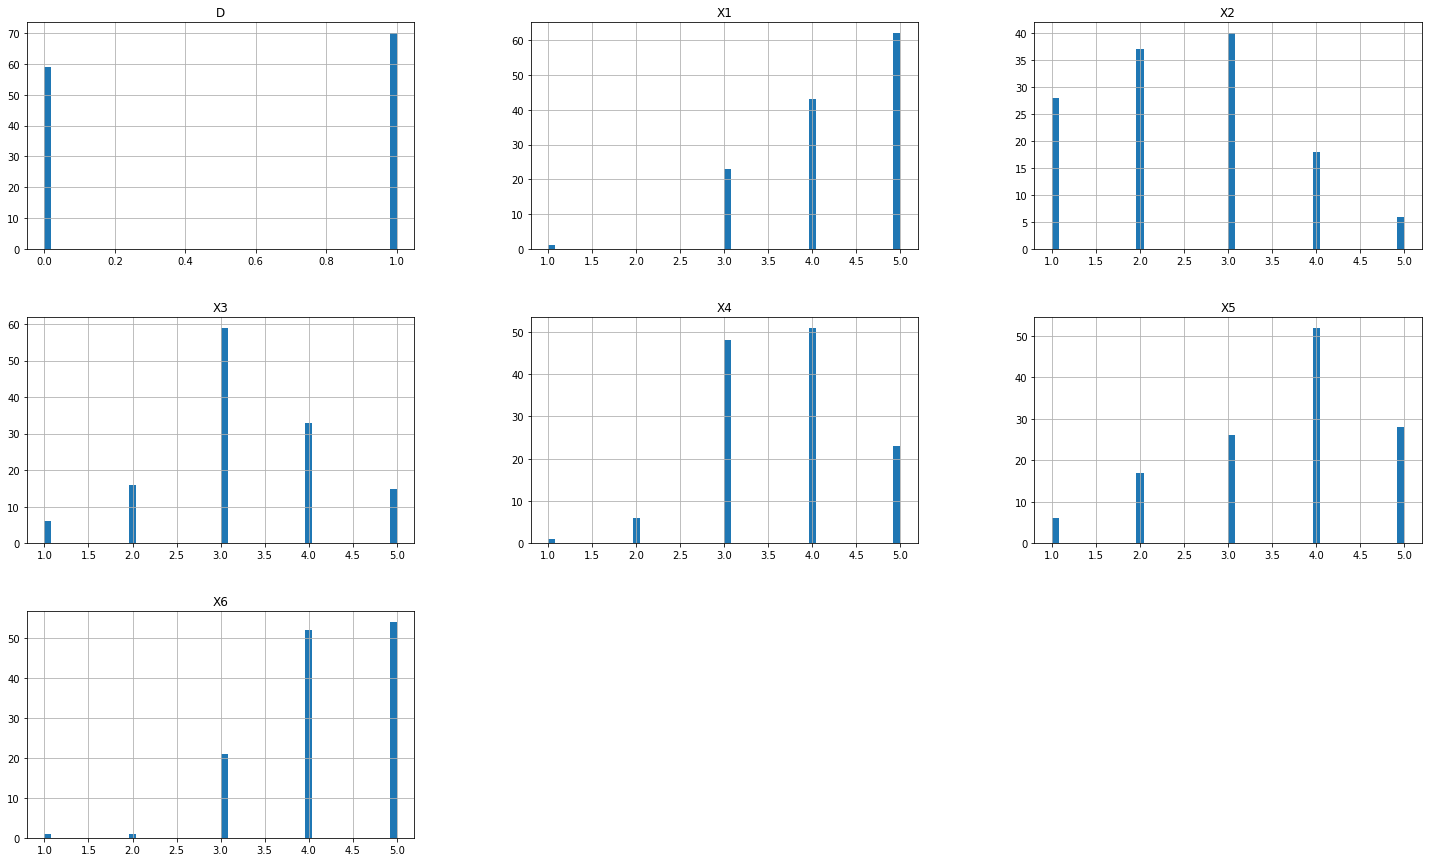

In [8]:
data.hist(bins=50,figsize=(25,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3d5aeb8080>,
      dtype=object)

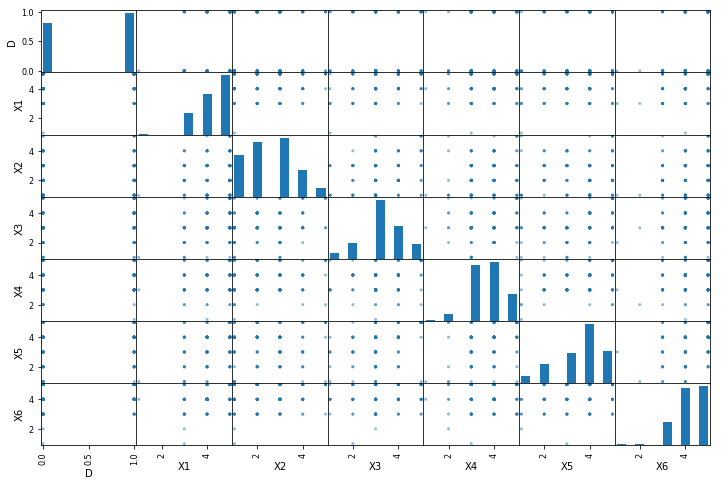

In [13]:
from pandas.plotting import scatter_matrix
scatter_matrix(data,figsize=(12,8))

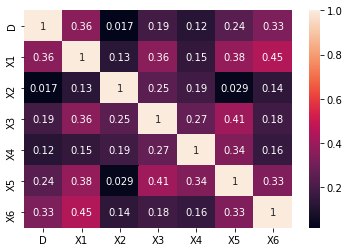

In [15]:
import seaborn as sns
corr=data.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,annot=True)

In [6]:
X=data.drop(["D"],axis=1)
Y=data["D"]

In [9]:
def separate(data):
    separated={}
    for i in range(len(data)):
        instance=data[i]
        if(instance[0] not in separated):
            separated[instance[0]]=np.asarray([instance])
        else: separated[instance[0]]=np.append(separated[instance[0]],[instance],axis=0)
    return separated

In [10]:
dataset=data.to_numpy()
separated=separate(dataset)

In [13]:
p_0=len(separated[0])/(len(separated[0])+len(separated[1]))
p_1=len(separated[1])/(len(separated[0])+len(separated[1]))

In [50]:
def probability_byclass(separated):
    probabilities={}
    n0=len(separated[0])
    n1=len(separated[1])
    for i in range(1,7):
        s1="p_X"+str(i)+"_D0"
        s2="p_X"+str(i)+"_D1"
        unique,counts=np.unique(separated[0][:,i],return_counts=True)
        counts=(counts+1)/(n0+5)
        d=dict(zip(unique,counts))
        for j in range(1,6):
            if j not in d.keys():
                d[j]=1/(n0+5)
        probabilities[s1]=d 
        
        unique,counts=np.unique(separated[1][:,i],return_counts=True)
        counts=(counts+1)/(n1+5)
        d=dict(zip(unique,counts))
        for j in range(1,6):
            if j not in d.keys():
                d[j]=1/(n1+5)
        probabilities[s2]=d
        
    return probabilities

In [51]:
prob=probability_byclass(separated)

In [52]:
prob.keys()

dict_keys(['p_X1_D0', 'p_X1_D1', 'p_X2_D0', 'p_X2_D1', 'p_X3_D0', 'p_X3_D1', 'p_X4_D0', 'p_X4_D1', 'p_X5_D0', 'p_X5_D1', 'p_X6_D0', 'p_X6_D1'])

In [53]:
def predict(test,prob):
    predictions=[]
    for i in range(test.shape[0]):
        instance=test[i]
        p0=1
        p1=1
        for i in range(1,7):
            s1="p_X"+str(i)+"_D0"
            s2="p_X"+str(i)+"_D1"
            p0=p0*prob[s1][instance[i]]
            p1=p1*prob[s2][instance[i]]
        p0=p0*p_0
        p1=p1*p_1
        if(p0>=p1):
            predictions.append(0)
        else:
            predictions.append(1)
            
    return predictions

In [54]:
ts=test.to_numpy()
predictions=predict(ts,prob)

In [59]:
count=0
for i in range(ts.shape[0]):
    if(ts[i,0]==predictions[i]):
        count+=1
print(count/ts.shape[0])
print(count)

0.35714285714285715
5


In [56]:
y_pred=predict(dataset,prob)
count=0
for i in range(datas.shape[0]):
    if(ts[i,0]==predictions[i]):
        count+=1
print(count/ts.shape[0])
print(count)

[1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1]

In [1]:
import pandas as pd
import numpy as np

class Naive_Bayes():
    
    def __init__(self):
        self.prob={}
        self.predictions=[]
        
    def separate(self,data):
        separated={}
        for i in range(len(data)):
            instance=data[i]
            if(instance[0] not in separated.keys()):
                separated[instance[0]]=np.asarray([instance])
            else: separated[instance[0]]=np.append(separated[instance[0]],[instance],axis=0)
        return separated

    def fit(self,data):
        separated=self.separate(data)
        
        n0=len(separated[0])
        n1=len(separated[1])
        self.prob["p0"]=n0/(n0+n1)
        self.prob["p1"]=n1/(n0+n1)
        
        
        for i in range(1,7):
            s1="p_X"+str(i)+"_D0"
            s2="p_X"+str(i)+"_D1"
            unique,counts=np.unique(separated[0][:,i],return_counts=True)
            counts=(counts+1)/(n0+5)
            d=dict(zip(unique,counts))
            for j in range(1,6):
                if j not in d.keys():
                    d[j]=1/(n0+5)
            self.prob[s1]=d 

            unique,counts=np.unique(separated[1][:,i],return_counts=True)
            counts=(counts+1)/(n1+5)
            d=dict(zip(unique,counts))
            for j in range(1,6):
                if j not in d.keys():
                    d[j]=1/(n1+5)
            self.prob[s2]=d
        
    def predict(self,test):
        count=0
        for i in range(test.shape[0]):
            instance=test[i]
            p_0=1
            p_1=1
            for j in range(1,7):
                s1="p_X"+str(j)+"_D0"
                s2="p_X"+str(j)+"_D1"
                p_0=p_0*self.prob[s1][instance[j]]
                p_1=p_1*self.prob[s2][instance[j]]
            p_0=p_0*self.prob["p0"]
            p_1=p_1*self.prob["p1"]
            if(p_0>=p_1):
                pred=0
            else:
                pred=1
            self.predictions.append(pred)
            if(instance[0]==pred): count+=1
            
        accuracy=count/(test.shape[0])
        print("count {}".format(count))
        print("accuracy: {}%".format(accuracy*100))

In [2]:
def read(path):
    raw=pd.read_csv(path).to_numpy()
    flag=0
    for i in range(raw.shape[0]):
        L=list(map(int,raw[i][0].split(',')))
        if flag==0:
            data=np.asarray([L])
            flag=1
        else:
            data=np.append(data,np.asarray([L]),axis=0)
    return data

In [3]:
data=read("data2_19.csv")
test=read("test2_19.csv")
model=Naive_Bayes()
model.fit(data)
model.predict(test)

count 5
accuracy: 35.714285714285715%
